<a href="https://colab.research.google.com/github/jinsooya/emba/blob/main/02_web-scraping-basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

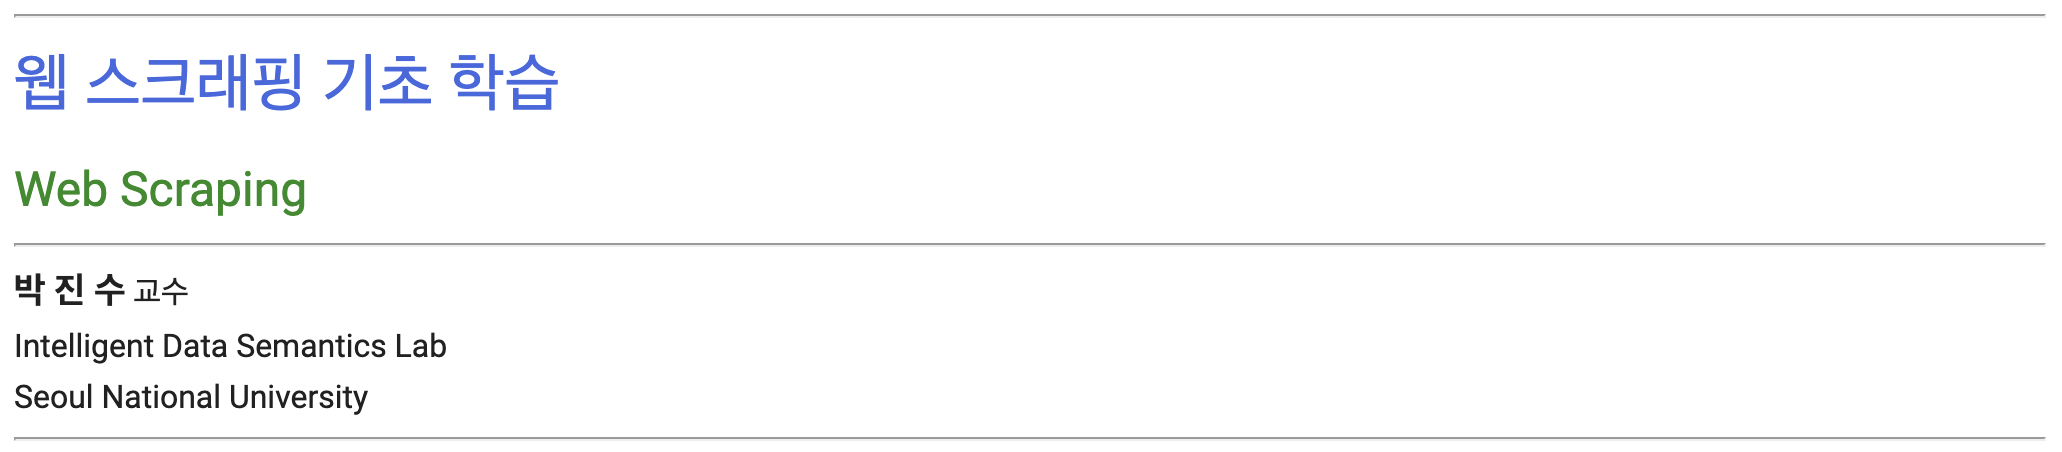

- - -

- 본 자료는 강의를 위한 목적으로 제작되었습니다.
- 본 자료에 대한 사전 허가를 받지 않는 배포를 금지합니다.
- 본 자료를 강의나 다른 목적으로 활용하고자 하시는 경우 꼭 아래 이메일 주소로 연락주세요.
- 연락처 : [jinsoo@snu.ac.kr](jinsoo@snu.ac.kr)

- - -

**목차**

>[네이버 금융 사이트](#scrollTo=_WkoRXqnMKJQ)

>[다음 어학사전](#scrollTo=DKQhbrhOoTU6)

>>[단어의 검색 결과 출력](#scrollTo=HcTVjtGYoTU7)

>>[여러 단어의 검색 결과 출력](#scrollTo=KMuut0vXoTVL)

>[한글 위키피디아](#scrollTo=COwE5tWeMzoy)

>>[스크래핑](#scrollTo=5BFsJDVONeHk)

>>[수집한 데이터를 파일로 저장하고 읽기](#scrollTo=36TSCRfVNrX-)

>>[입력한 아티클을 검색하고 결과 출력 (과제 2)](#scrollTo=rqzR8kVt6say)

>[IMDb](#scrollTo=4rNM7rUBoTV1)

>>['보헤미안 랩소디' 영화 리뷰 첫 번째 내용 출력](#scrollTo=LVMF4A7KYhua)

>>['보헤미안 랩소디' 영화 리뷰 첫 25개 내용 출력 (과제 2)](#scrollTo=zUbA0Z5GoTWL)

>[멜론 인기 차트 시각화](#scrollTo=0aYR1wcj_ctQ)



**BeautifulSoup**은 파이썬 웹 스크래핑/크롤링에 가장 널리 사용하는 라이브러리로, HTML 문서를 탐색해서 원하는 데이터를 쉽게 추출해 낼 수 있다.
- HTML에서 필요한 데이터를 가져오기 위해 다양한 메소드를 사용할 수 있다. 가장 대표적인 메소드는 다음과 같고, 자세한 내용은 [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)에서 확인할 수 있다.
    + **find** 메소드
    + **find_all** 메소드
    + **select_one** 메소드
    + **select** 메소드
    + **get_text** 메소드

# 네이버 금융 사이트

**USD 환율 확인하기**

- https://finance.naver.com/marketindex/

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

URL = 'https://finance.naver.com/marketindex/'
bs = BeautifulSoup(urlopen(URL), 'html.parser')

In [ ]:
# 현재 각 나라의 환율을 포함하고 있는 태그 내용을 추출한다.
# YOUR CODE HERE

In [ ]:
# 현재 미국 달러 환율을 포함하고 있는 태그 내용을 추출한다.
# YOUR CODE HERE

In [ ]:
# 현재 미국 달러 환율을 포함하고 있는 태그 안의 텍스트 내용만 추출한다.
# YOUR CODE HERE

# 다음 어학사전

**requests 패키지**
- 장점
    + 웹 페이지에 접근하는 데에 있어서 안정성이 뛰어나다.
    + 또한 복잡한 요청 및 header를 잘 조절할 수 있다.
        - 예를 들어, **headers**에서 user-agent 설정 및 쿠키 설정을 포함시켜서 원하는 대로 맞춤화하여 처리할 수 있다.
    + 유니코드 외에 멀티바이트 등과 같이 **다양한 언어로 이루어진 웹 페이지**에 접근할 때도 잘 작동하는 것을 보면, **범용성**이 매우 우수하다고 평가받는다.
- 단점
    + 별도로 설치를 해야만 사용할 수 있다.
        - **urllib.request.urlopen**은 파이썬의 기본 내장 라이브러리에서 불러올 수 있기 때문에 별도의 설치가 필요없다.


## 단어의 검색 결과 출력

- - -

- 다음 어학사전에서 'python' 단어를 검색한 결과 화면의 가장 상단에 나타나는 단어의 뜻을 출력한다.
  + https://dic.daum.net/

- 영어 단어의 의미(본 예제에서는 '1.파이톤 2.왕뱀 3.비단뱀')를 출력한다.

- - -

**TIPS**
- 가져오고자 하는 텍스트의 다른 HTML 구성요소와 구분되는 특성(CSS style)을 잘 생각해 본다.
- 가장 상단에 있는 데이터임을 고려하면서 HTML 파싱 결과를 어떻게 슬라이싱(slicing)할 것인지 고민해 본다.

In [ ]:
import requests
from bs4 import BeautifulSoup

# 검색하고 싶은 단어를 변수에 할당한다.
target = 'python'

# 불러오려는 url을 지정한다.
# 디폴트 url에 string 타입의 target 변수를 합쳐서 URL 변수를 생성한다.
URL = 'https://dic.daum.net/search.do?q=' + target

# requests.get으로 통해 웹페이지를 불러온다.
page = requests.get(URL)

# BeautifulSoup으로 HTML구조를 파싱한다.
bs = BeautifulSoup(page.text, 'html.parser')

In [ ]:
# ----- find 메소드를 통해 찾고자 하는 단어와 단어의 뜻이 있는 HTML 태그를 찾는다.
# find(name, attrs, recursive, string, **kwargs)
# 찾고자 하는 단어가 있는 곳에서 단어를 추출한다.
# 'python' 텍스트가 있는 태그와 속성을 찾는다.
word = # YOUR CODE HERE

In [ ]:
word

In [ ]:
word.get_text()

In [ ]:
# 단어의 뜻이 있는 곳에서 태그와 속성을 찾는다.
meaning = # YOUR CODE HERE

In [ ]:
meaning

In [ ]:
print(meaning.get_text())

## 여러 단어의 검색 결과 출력

- - -

- [다음 어학사전](https://dic.daum.net/)에 'python', 'anaconda', 'study', 'machine', 'curiosity' 5개 단어를 검색한 결과 화면의 가장 상단에 나타나는 단어의 뜻을 출력한다.

- 각 영어 단어의 의미를 출력한다.

- - -

**TIPS**
- **for** 문을 활용해 여러 단어를 돌아가면서 데이터를 출력한다!
- 초기 화면에서 몇 개 단어를 검색해 보면서 URL 구조를 잘 생각해 본다.

![aum-dict-url](https://drive.google.com/uc?id=1ResSaWNAne2V7xjQxM1up6qMYNvXljUk)

In [ ]:
import requests
from bs4 import BeautifulSoup

# 검색하고 싶은 단어가 여러 개이면 복수의 단어를 튜플로 담는다.
targets = 'python', 'anaconda', 'study', 'machine', 'curiosity'

# for문을 통해 각각의 단어와 그 뜻을 출력한다
for target in targets:  # 단어 목록에서 각각의 단어를 꺼낸다.
    # 불러오려는 url을 변수에 할당한다.
    URL = 'https://dic.daum.net/search.do?q=' + target

    # requests.get 함수를 통해 웹페이지를 불러와서 HTML 구조를 BeautifulSoup으로 파싱한다.
    bs = BeautifulSoup(requests.get(URL).text, 'html.parser')
    # --- 만약 위 코드 실행해서 HTTPError가 나면 아래 코드로 시도한다. ----------------
    # header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7'
    # bs = BeautifulSoup(requests.get(URL, headers=header).text, 'html.parser')
    # ---------------------------------------------------------------------

    # --- find 메소드를 통해 찾고자 하는 단어와 단어의 뜻이 있는 HTML 태그를 찾는다.
    # 찾고자 하는 단어가 있는 태그를 추출한다.
    word = # YOUR CODE HERE

    # 단어의 뜻이 있는 곳에서 단어의 뜻을 추출함
    meaning = # YOUR CODE HERE

    # --- get_text 메소드로 텍스트를 추출하고 이를 출력한다.
    print(word.get_text(), end='')
    print(meaning.get_text())
else:
    print('--- Job completed!', '-' * 11)

# 한글 위키피디아

위키피디아(<https://ko.wikipedia.org/wiki/>)의 웹 페이지에서 원하는 정보를 수집하는 코드를 따라해보자.

- - -
**[참고] URL 인코딩**
- URL에서 URL로 사용할 수 없는 문자 혹은 URL로 사용할 수 있지만 의미가 왜곡될 수 있는 문자들을 '%XX'의 형태로 변환하는 과정을 말한다.
- URL은 ASCII(American Standard Code for Information Interchange) 코드 값만 사용하기 때문에 한글은 ASCII 코드로 표현할 수 없다. 따라서 **urllib.parse**를 사용해 한글 부분 URL을 인코딩 해주어야 한다.
- - -

In [ ]:
# URL에 접속해 내용물(HTML)을 받아오기 위해 필요한 라이브러리
import requests
from urllib import parse
from bs4 import BeautifulSoup

# 위키피디아에서 불러오려는 페이지의 키워드
keyword = '한국어'

# keyword를 url 형식에 맞게 인코딩한다.
URL = 'https://ko.wikipedia.org/wiki/' + parse.quote(keyword)

# requests.get으로 통해 웹페이지를 불러온다.
page = requests.get(URL)

# BeautifulSoup으로 HTML구조를 파싱한다.
bs = BeautifulSoup(page.text, 'html.parser')

# 받아온 HTML 코드 중 300개 문자를 보기 좋게 출력한다.
print(bs.prettify()[:300])

**헤더 설정**
- **BeautifulSoup**을 사용해 스크래핑/크롤링을 하면, 가끔 서버에서 봇(bot)으로 인지하고 차단하는 경우가 발생할 수 있다. 이를 방지하기 위해 **headers**를 입력해준다.

- 다음은 기본 **urllib** 라이브러리를 사용하는 일반적인 파이썬 코드에서 보내는 헤더다.


|Field           | Example |
| -              | - |
|Accept-Encoding | `identity` |
|User-Agent      | `Python-urllib/3.13` |


- **requests** 모듈을 사용하면 헤더를 원하는 대로 바꿀 수 있다. **headers** 정보에 **{'User-Agent' : '유저정보'}** 를 넣어줘야 하는데, 이 '유저정보'는 아래의 사이트에서 얻을 수 있다.
    + http://www.useragentstring.com/


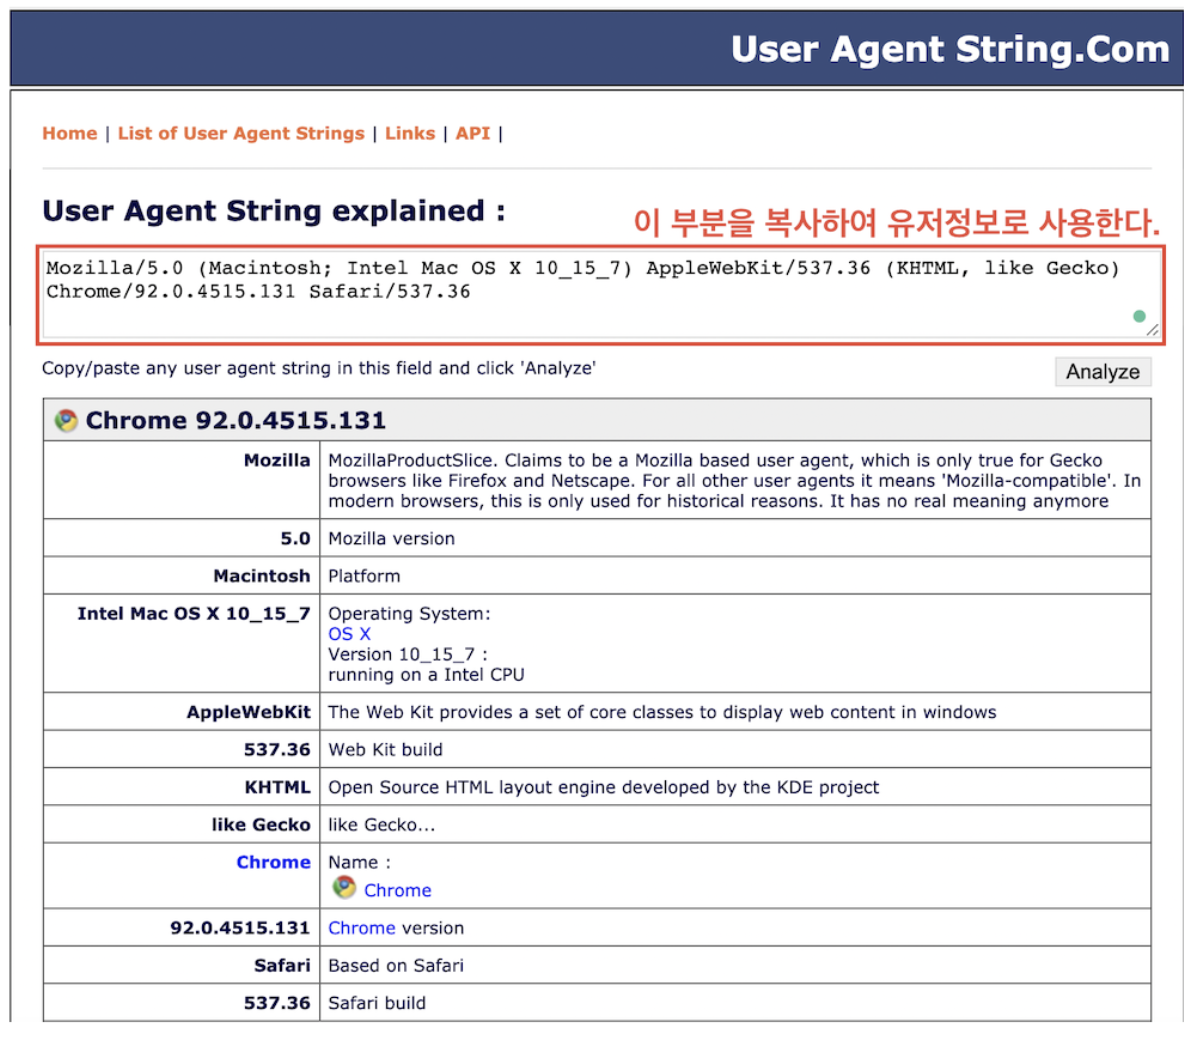

In [ ]:
# URL에 접속해 내용물(HTML)을 받아오기 위해 필요한 라이브러리
import requests
from urllib import parse
from bs4 import BeautifulSoup

# 위키피디아에서 불러오려는 페이지의 키워드
keyword = '한국어'

# keyword를 url 형식에 맞게 인코딩한다.
URL = 'https://ko.wikipedia.org/wiki/' + parse.quote(keyword)

# request 요청을 보낼 때 나의 웹 브라우저 헤더 정보를 User Agent로 설정한다.
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)'
}

# requests의 get을 통해 헤더 정보와 함께 웹페이지를 불러온다.
page = requests.get(URL, headers=headers)

# BeautifulSoup으로 HTML구조를 파싱한다.
bs = BeautifulSoup(page.text, 'html.parser')

# 받아온 HTML 코드 중 300개 문자를 보기 좋게 출력한다.
print(bs.prettify()[:300])

## 스크래핑

위키피디아 웹 페이지에서 설명 문단은 해당 태그를 식별하는 속성 **id**의 값이 'bodyContent'인 **\<div>** 태그로 구분한다. 그리고 위키피디아 웹 페이지의 각 문단은 **\<p>** 태그 안에 있다. 따라서 본문의 각 문단은 다음 코드로 간단히 불러올 수 있다.

In [ ]:
# div 태그 중 id가 bodyContent인 첫 번째 요소를 탐색하여 변수 body에 저장한다.
body = bs.find('div', id='bodyContent')

# body의 하위에 있는 모든 <p> 태그를 탐색하여 변수 paragraphs에 저장한다.
paragraphs = body.find_all('p')

# 리스트 paragraphs 안의 각 객체에 대해 HTML 코드를 제거하고 내용 텍스트만 출력한다.
for p in paragraphs:
    print(p.text)

## 수집한 데이터를 파일로 저장하고 읽기

In [ ]:
# --- 파일을 쓰기 모드로 열어 수집한 데이터를 저장한다.
filename = 'wiki-korean.txt'
with open(filename, mode='w', encoding='utf-8') as file:
    for p in paragraphs:
        # 리스트 paragraphs 안의 각 객체에 대해 HTML 코드를 제거하고 내용 텍스트만 쓴다.
        # 이때 문단별로 새줄바꿈해서 저장한다.
        if len(p.text) > 1:   # 빈 줄이면 건너뛰고 그렇지 않으면 기록한다.
            file.write(p.text)
    else:
        print(f"수집한 데이터를 '{filename}'로 저장하였습니다.")

In [ ]:
# 작성한 파일의 내용을 읽기모드로 열어서 한줄씩 읽는다.
data = open(filename, mode='r', encoding='utf-8').read().splitlines()

# 파일의 각 줄 번호와 함께 출력한다.
for index, line in enumerate(data, start=1):
    print(f'{index:3}: {line}')

## [입력한 아티클을 검색하고 결과 출력 (과제 2)](https://colab.research.google.com/drive/1Zq01o9FiV5DPuQfqEu52W_9DNy2RoorR?usp=sharing)

In [ ]:
import requests
from urllib import parse
from bs4 import BeautifulSoup

# 검색하고자 하는 키워드를 입력 받는다.
keyword = input('위키백과에서 검색할 키워드를 입력하세요...: ')

# YOUR CODE HERE

# IMDb

## '보헤미안 랩소디' 영화 리뷰 첫 번째 내용 출력

- - -

IMDb 사이트의 영화 보헤미안 랩소디 페이지(<https://www.imdb.com/title/tt1727824/>)에서 리뷰 페이지에 들어가 첫 번째 리뷰 내용을 출력해 보자.
- https://www.imdb.com/title/tt1727824/reviews/?ref_=tt_ov_ql_2

- - -

![bohemian-rhapsody](https://drive.google.com/uc?id=11nNMEMyKb4iEMmTc9RV67x2bwdhNXDAC)

In [ ]:
import requests
from bs4 import BeautifulSoup

# 불러오려는 url을 지정한다.
URL = 'https://www.imdb.com/title/tt1727824/reviews/?ref_=tt_ov_ql_2'

# request 요청을 보낼 때 나의 웹 브라우저 헤더 정보를 User Agent로 설정한다.
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)'
}

# requests의 get을 통해 헤더 정보와 함께 웹페이지를 불러온다.
page = requests.get(URL, headers=headers)

# 불러온 웹페이지의 HTML 구조를 BeautifulSoup으로 파싱한다.
bs = BeautifulSoup(page.text, 'html.parser')

# 리뷰 데이터가 있는 태그를 찾아서 첫 리뷰 코멘트를 출력한다. 만약 첫 리뷰 코멘트가 비워져 있다면 빈 문자열을 출력한다.
review = # YOUR CODE HERE
print(review.get_text().replace('\n', ' '))

## ['보헤미안 랩소디' 영화 리뷰 첫 25개 내용 출력 (과제 2)](https://colab.research.google.com/drive/1Zq01o9FiV5DPuQfqEu52W_9DNy2RoorR?usp=sharing)

- - -

영화 [보헤미안 랩소디(Bohemian Rhapsody)](https://www.imdb.com/title/tt1727824/)의 리뷰 페이지에 들어가 첫 **25**개의 리뷰 내용을 출력해 보자.
- https://www.imdb.com/title/tt1727824/reviews/?ref_=tt_ov_ql_2
- - -

In [ ]:
import requests
from bs4 import BeautifulSoup

# 불러오려는 url을 지정한다.
URL = 'https://www.imdb.com/title/tt1727824/reviews/?ref_=tt_ov_ql_2'

# YOUR CODE HERE

# 멜론 인기 차트 시각화

- - -

국내 디지털 음원 스트리밍 사이트인 '멜론'의 실시간 인기차트를 스크래핑한 후 그 결과를 판다스의 데이터프레임으로 구성하고 CSV 파일로 저장한다. 그리고 가사 데이터에서 명사만 추출하여 워드클라우드로 시각화한다.

- [멜론 실시간 인기차트](https://www.melon.com/chart/index.htm)

- - -

**실행 결과** (실시간 정보를 가져오기 때문에 현재 결과는 다를 수 있다.)
<pre>> python melon_visualization-bs4.py</pre>
![Melon-Pandas](https://drive.google.com/uc?id=16MgKrgc7Uw7agdyk14AmRWOVZBz5dZvu)

위 내용을 'melon-chart-100.csv'로 저장하였습니다.

![Melon-Chater](https://drive.google.com/uc?id=1sfjx5P2LmNP2QK8dbDrsPUWn9GYPio0G)

In [ ]:
import requests, urllib
from bs4 import BeautifulSoup

# --- 멜론차트 TOP100의 내역을 확인한다.
# 멜론차트 TOP100
URL = 'https://www.melon.com/chart/index.htm'

# request 요청을 보낼 때 나의 웹 브라우저 헤더 정보를 User Agent로 설정한다.
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)'
}

# 헤더 정보와 함께 웹페이지를 불러와서 HTML 구조를 BeautifulSoup으로 파싱한다.
page = requests.get(URL, headers=headers)

# 페이지 소스를 가져온다.
bs = BeautifulSoup(page.text, 'html.parser')

In [ ]:
# --- 곡명과 아티스트명을 가져온다.
# 곡명만 가져와 리스트에 담는다.
titles = # YOUR CODE HERE

# 아티스트명만 가져와 리스트에 담는다.
artists = # YOUR CODE HERE

In [ ]:
titles[:10]

In [ ]:
artists[:10]

**노래 가사 가져오기**
- 노래 가사 데이터가 담긴 URL은 다음과 같이 'https://www.melon.com/song/detail.htm?songId=' + '노래 고유ID'의 조합으로 이루어져있다.
    + 예) https://www.melon.com/song/detail.htm?songId=33480898
- 따라서 노래 고유ID를 먼저 가져온 다음, URL을 조합해서 가사를 가져온다.

![Song ID](https://drive.google.com/uc?id=1TEdG6LLpOHcpsP28Dw1YjXCPeYYhTxIU))

In [ ]:
# 곡의 고유 ID를 가져온다.
# [주의] '1-50위'의 태그와 '51-100위'의 태그명이 다르게 되어있다.
song_id_tags = bs.find_all('tr', ('lst50', 'lst100'))
len(song_id_tags)

In [ ]:
# 태그에는 여러 속성이 있을 수 있는데, attrs를 통해 특정 속성만 가져올 수 있다.
song_ids = [song.attrs['data-song-no'] for song in song_id_tags]
len(song_ids)

In [ ]:
song_ids[:5]

In [ ]:
from tqdm.notebook import tqdm

LYRIC_URL = 'https://www.melon.com/song/detail.htm?songId={}'  # 노래 가사가 있는 URL template
lyrics = []  # 노래 가사를 담을 리스트를 초기화한다.

for song_id in tqdm(song_ids):
    page = requests.get(LYRIC_URL.format(song_id), headers=headers)
    bs = BeautifulSoup(page.text, 'html.parser')
    found = bs.find('div', 'lyric')  # 성인 인증이 필요하지 않는 가사
    for br in found.find_all('br'): # <br>을 공백으로 처리한다. 그렇지 않으면 각 줄의 마지막
        br.replace_with(' ')        # 구문과 다음 줄의 시작 구문 가사가 하나의 단어로 합쳐진다.
    lyrics.append(found.get_text().strip() if found else '성인 인증이 필요한 가사')

In [ ]:
lyrics[:3]

In [ ]:
# 가져온 가사를 판다스 데이터프레임으로 구성한다.
import pandas

rank = list(range(1, 101)) # 가져온 데이터들을 순위와 함께 저장한다.
df = pandas.DataFrame({
    '순위': list(range(1, 101)),
    '곡명': titles,
    '아티스트': artists,
    '가사': lyrics
})
df

In [ ]:
# '순위'를 인덱스로 설정한다.
df.set_index('순위', inplace=True)
df

In [ ]:
# 수집한 데이터를 CSV로 저장한다.
filename = 'melon-chart-100.csv'
df.to_csv(filename, encoding='utf-8')

print(f"위 내용을 '{filename}'로 저장하였습니다.")

**<font size='+1'>가사 데이터에서 명사만 추출하여 워드클라우드로 시각화</font>**

In [ ]:
# 한글 가사 형태소 분석(명사추출)을 위해 Konlpy를 설치해준다.
!python -m pip install -q konlpy

In [ ]:
# 가사 데이터를 하나의 말뭉치 텍스트로 합쳐서 준비한다.
text = ' '.join(lyrics)

In [ ]:
from konlpy.tag import Okt  # 한국어 텍스트 분석에 필요한 모듈(konlpy)의 Open Korean Text 형태소 분석기를 불러온다.

# Open Korean Text 형태소 분석기 객체를 생성한다.
okt = Okt()

# text의 각 문장을 꺼낸 후 형태소 분석기를 통해 문자 길이가 2개 이상인 명사만 추려내 리스트에 담는다.
nouns = [noun for noun in okt.nouns(text) if len(noun) > 1]

In [ ]:
# nouns 리스트에서 고유한 명사의 개수를 구한다.
from collections import Counter
nouns_count = Counter(nouns)
len(nouns_count)

In [ ]:
# 한글 폰트를 설치한다.
!apt -qq -y install fonts-nanum

In [ ]:
from wordcloud import WordCloud

# 나눔바른고딕(NanumBarunGothic)을 사용하기 위해 경로를 포함시킨다.
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(
  font_path=fontpath,
  width = 1500, height = 1000,
  #background_color='white',
).generate_from_frequencies(dict(nouns_count))  # 빈도가 높은 100개의 명사로 워드클라우드를 만든다.

wordcloud

In [ ]:
from matplotlib import pyplot

pyplot.figure(figsize=(16, 10))  # width, height in inches
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show();

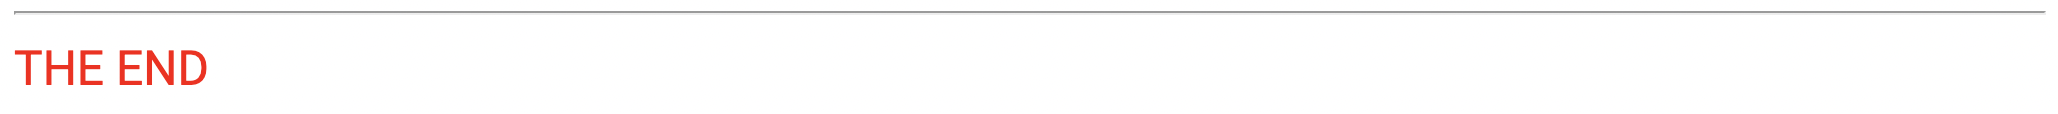